In [411]:
import pandas as pd
from scipy.integrate import solve_ivp, quad
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [359]:
γ = 1/2.4
fecha_inicio = pd.to_datetime("27-february-2020")
r = 0.7
inicio_red = 25
f = 0.9
q = 0.1356473594548552
ν = 5/12
η = 1/7
ϵ = 1/1.4
θ = 1/2.4
pa, pm, ps = 0.5, 0.476, 0.024
σ = 1/4.7
ξ = 1/4
τ = 1/5

In [360]:
ABTdf = pd.read_csv("D:/Edgar Trejo/Universidad/Proyecto/COVID19Model/data/cleandata/ABTrf_reg.csv", dtype={0:str}, index_col = 0)

In [361]:
pob = pd.read_csv('https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/cleandata/pob_reg.csv',
                 index_col = 0, dtype = {'cve_umun':str})

In [362]:
pob = pob['pop'].to_list()


In [363]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [364]:
ABT = ABTdf.to_numpy()

In [365]:
train_X, test_X, train_Y, test_Y = train_test_split(ABT[:, :-1], ABT[:, -1], test_size = 0.25, random_state = 42)

In [366]:
rf.fit(train_X, train_Y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [367]:
Y = rf.predict(ABT[:, :-1])

In [368]:
ABTdf

,t,i,Ia_1,Ia_2,Ia_3,Ia_4,Ia_5,Ia_6,Im_1,Im_2,...,Im_4,Im_5,Im_6,Ip_1,Ip_2,Ip_3,Ip_4,Ip_5,Ip_6,y
0,0,0,0.508881,0.000000,0.000000,0.000000,0.000000,0.057923,0.000000,0.000000,...,0.000000,0.000000,0.000000,84.705672,5.198355,30.232604,23.384110,0.261209,6.343090,0.000032
1,0,1,0.031797,0.000000,0.000000,0.000000,0.000000,0.031491,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.292796,160.647292,3.332229,29.931629,1.190066,3.448601,0.000020
2,0,2,0.027761,0.000000,0.000000,0.000000,0.000000,0.028200,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.620941,2.075855,75.054415,8.428530,0.394272,3.088117,0.000017
3,0,3,0.152755,0.000000,0.000000,0.000000,0.000000,0.127529,0.000000,0.000000,...,0.000000,0.000000,0.000000,25.426795,24.622030,7.475448,133.444640,0.693807,13.965624,0.000029
4,0,4,0.003459,0.000000,0.000000,0.000000,0.000000,0.017105,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.575820,2.481884,0.719316,1.698528,15.254237,1.873115,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,94,1,263.135135,8450.327670,131.956159,1058.135445,136.898353,132.629801,225.349093,7241.148085,...,906.386098,117.327753,113.557228,412.532397,14419.888224,204.328817,1699.032309,236.948662,203.096007,0.001094
2,94,2,319.998871,279.391998,2568.362985,444.650151,41.324026,174.105577,274.047231,239.413063,...,380.881973,35.416461,149.068660,501.681014,476.762740,3977.007012,713.968119,71.525132,266.607860,0.000519
3,94,3,1420.916323,1415.596630,321.575147,5474.602580,77.032350,542.046689,1216.873618,1213.035190,...,4689.478739,66.020024,464.098708,2227.653927,2415.615817,497.946210,8790.487746,133.330401,830.036064,0.001197
4,94,4,36.427650,168.396940,37.854658,77.271496,1524.981074,94.889162,31.196662,144.300580,...,66.189835,1306.974113,81.243808,57.109765,287.357503,58.616419,124.073690,2639.492862,145.303768,0.000931


In [409]:
λ1(94, 5)

array([[9.40000000e+01, 5.00000000e+00, 4.42330020e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.41855901e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.34267833e+00, 4.10725188e+00,
        3.52838250e+00, 1.31052292e+01, 1.40303765e+00, 8.08622932e+01]])

In [404]:
L(94, 3, [1, 0, 0, 0, 0, 1], [0]*6, x0df['Ip0'])

0.0007253790494877729

In [406]:
λ(3, 50)

0.0023993985978148125

In [401]:
Y

array([2.69610948e-05, 1.95741753e-05, 1.75035962e-05, 2.86637411e-05,
       9.84346750e-06, 1.96807696e-05, 4.37811755e-05, 2.18471663e-05,
       1.94397095e-05, 3.56228952e-05, 1.00651146e-05, 2.34688950e-05,
       4.30826675e-05, 2.37769653e-05, 2.17914511e-05, 4.30355979e-05,
       1.15200350e-05, 2.47891056e-05, 4.73912824e-05, 2.55441119e-05,
       2.51253956e-05, 4.26189034e-05, 1.30136812e-05, 2.68799794e-05,
       5.04184936e-05, 2.72727473e-05, 2.41199641e-05, 4.44712321e-05,
       1.24291608e-05, 2.76213789e-05, 5.40698477e-05, 2.99229321e-05,
       2.68139392e-05, 4.90666802e-05, 1.34173321e-05, 3.12909836e-05,
       5.93138458e-05, 3.28200673e-05, 2.96611835e-05, 5.65095944e-05,
       1.46469760e-05, 3.44556972e-05, 6.29066916e-05, 3.61184274e-05,
       3.24170150e-05, 5.85078651e-05, 1.59744690e-05, 3.76900689e-05,
       7.04083003e-05, 3.87519779e-05, 3.57393912e-05, 6.29831580e-05,
       1.74040751e-05, 4.14131667e-05, 7.85197679e-05, 4.64599780e-05,
      

In [369]:
λ = lambda j, t: Y[6*int(t) + j]

In [370]:
def Model(t, X):
    
    dXdt = np.zeros(6*8)
    
    S = lambda i: X[8*i + 0]
    E = lambda i: X[8*i + 1]
    Ip = lambda i: X[8*i + 2]
    Iss =  lambda i: X[8*i + 3]
    H = lambda i: X[8*i + 4]
    Ia = lambda i: X[8*i + 6]
    Im = lambda i: X[8*i + 7]
            
    for i in range(6):    
        # X_i; los componentes de cada ciudad
        # ecuación de los suceptibles para la ciudad i
        dXdt[8*i + 0] = -λ(i, t)*S(i)
        # ecuación de los expuestos para la ciudad i
        dXdt[8*i + 1] = λ(i, t)*S(i) - ϵ*E(i)
        # ecuación para los pre-infectados
        dXdt[8*i + 2] = ϵ*E(i) - θ*Ip(i)
        # ecuación para los infectados severos
        dXdt[8*i + 3] = θ*ps*Ip(i) - σ*Iss(i)
        # ecuación para los hospitalizados
        dXdt[8*i + 4] = σ*Iss(i) - (1-q)*τ*H(i) - ξ*q*H(i)
        # ecuación de los difuntos
        dXdt[8*i + 5] = q*ξ*H(i)
        # ecuación de los asintomáticos
        dXdt[8*i + 6] = θ*pa*Ip(i) - γ*Ia(i)
        # ecuación de los mild sym
        dXdt[8*i + 7] = θ*pm*Ip(i) - γ*Im(i)

    return dXdt

In [371]:
x0df = pd.read_csv("https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/cleandata/x0_reg.csv", index_col = 0)

In [372]:
x0df

,Ip0,E0
region,,
0,166,119
1,205,144
2,89,64
3,205,146
4,18,13
5,109,79


In [373]:
x0 = []
indicesCasos = [0, 5]

for i in range(6):
    if i in indicesCasos:
        x0.extend([pob[i]-x0df.iloc[i, 0]-x0df.iloc[i, 1] - 1, x0df.iloc[i, 1], x0df.iloc[i, 0], 0, 0, 0, 1, 0])
    else:
        x0.extend([pob[i]-x0df.iloc[i, 0]-x0df.iloc[i, 1], x0df.iloc[i, 1], x0df.iloc[i, 0], 0, 0, 0, 0, 0])

In [374]:
tdata = np.linspace(0, 93, 94)
    
solBase = solve_ivp(Model, (0, 94), x0, t_eval = tdata)

In [375]:
len(solBase.y)

48

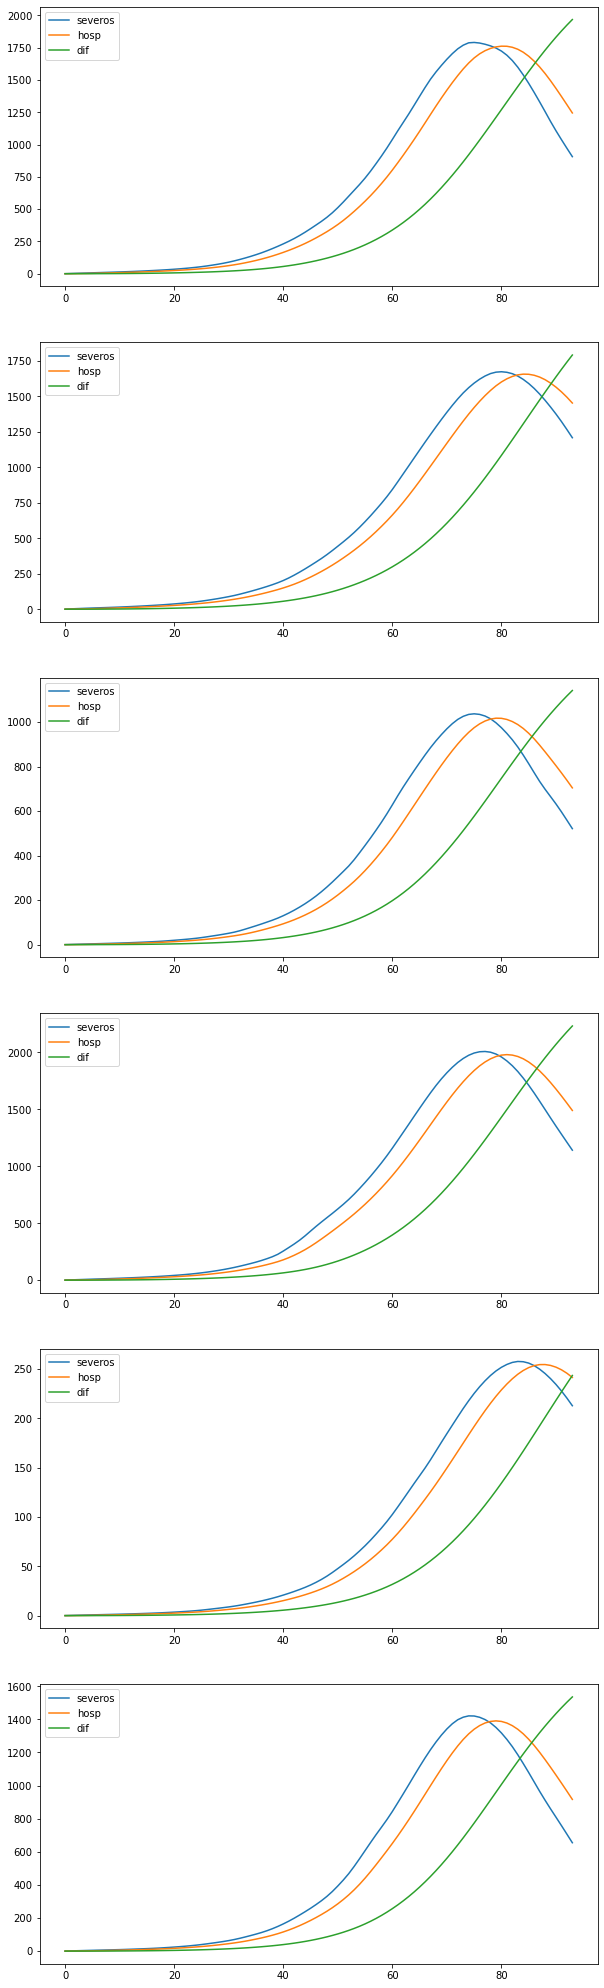

In [376]:
fig, ax = plt.subplots(6, figsize = (10, 36))

for i in range(6):
    #ax[i].plot(sol.y[8*i + 1, :], label = 'expuestos')
    #ax[i].plot(sol.y[8*i + 2, :], label = 'pre_infe')
    ax[i].plot(solBase.y[8*i + 3, :], label = 'severos')
    ax[i].plot(solBase.y[8*i + 4, :], label = 'hosp')
    ax[i].plot(solBase.y[8*i + 5, :], label = 'dif')
    #ax[i].plot(sol.y[8*i + 6, :], label ='asi')
    #ax[i].plot(sol.y[8*i + 7, :], label = 'mild')
    ax[i].legend()
    
plt.show()

In [377]:
es = pd.read_csv("https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/cleandata/viajes/viajes_es_reg.csv",
                index_col = 0)

s = pd.read_csv("https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/cleandata/viajes/viajes_s_reg.csv",
                index_col = 0)

d = pd.read_csv("https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/cleandata/viajes/viajes_d_reg.csv",
                index_col = 0)

In [378]:
viajes = [es, s, d]

In [391]:
inicio_red = 25

In [392]:
R = lambda t: (1-r) if t > inicio_red else 1

In [399]:
def λ1(t, i, Ia, Im, Ip):
    wd = (fecha_inicio.weekday() + t) % 7
    
    ixdf = None
    
    if wd == 5:  #sábado
        ixdf = 1
    elif wd == 6: #domingo
        ixdf = 2
    else:
        ixdf = 0
    
    a = np.zeros(20, dtype = np.float64)
        
    a[0] = t
    a[1] = i
    
    for j in range(6):
        a[2 + j] = Ia[j] * viajes[ixdf].iloc[j, i] * R(t) / sum( viajes[ixdf].iloc[:, j]*R(t) )
    
    for j in range(6):
        a[8 + j] = f * Im[j] * viajes[ixdf].iloc[j, i]*R(t) / sum( viajes[ixdf].iloc[:, j]*R(t) )
    
    for j in range(6):
        a[14 + j] = Ip[j] * viajes[ixdf].iloc[j, i]*R(t) / sum( viajes[ixdf].iloc[:, j]*R(t) )
    
    return a.reshape((1, 20))

In [394]:
L = lambda t, i, Ia, Im, Ip: rf.predict(λ1(t, i, Ia, Im, Ip))[0]

In [395]:
def Model(t, X):
    
    dXdt = np.zeros(6*8)
    
    S = lambda i: X[8*i + 0]
    E = lambda i: X[8*i + 1]
    Ip = lambda i: X[8*i + 2]
    Iss =  lambda i: X[8*i + 3]
    H = lambda i: X[8*i + 4]
    Ia = lambda i: X[8*i + 6]
    Im = lambda i: X[8*i + 7]
            
    for i in range(6):    
        # X_i; los componentes de cada ciudad
        # ecuación de los suceptibles para la ciudad i
        fuerza = L(t, i, [Ia(i) for i in range(6)], [Im(i) for i in range(6)], [Ip(i) for i in range(6)])
        
        dXdt[8*i + 0] = -fuerza*S(i)
        # ecuación de los expuestos para la ciudad i
        dXdt[8*i + 1] = fuerza*S(i) - ϵ*E(i)
        # ecuación para los pre-infectados
        dXdt[8*i + 2] = ϵ*E(i) - θ*Ip(i)
        # ecuación para los infectados severos
        dXdt[8*i + 3] = θ*ps*Ip(i) - σ*Iss(i)
        # ecuación para los hospitalizados
        dXdt[8*i + 4] = σ*Iss(i) - (1-q)*τ*H(i) - ξ*q*H(i)
        # ecuación de los difuntos
        dXdt[8*i + 5] = q*ξ*H(i)
        # ecuación de los asintomáticos
        dXdt[8*i + 6] = θ*pa*Ip(i) - γ*Ia(i)
        # ecuación de los mild sym
        dXdt[8*i + 7] = θ*pm*Ip(i) - γ*Im(i)

    return dXdt

In [396]:
tdata = np.linspace(0, 93, 94) #22:38 
    
sol = solve_ivp(Model, (0, 94), x0, t_eval = tdata)

In [397]:
Ys = sol.y

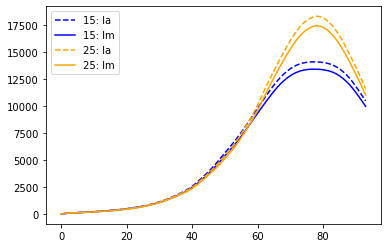

In [398]:
plt.plot()
plt.plot(Ys[8*1 + 6], label = '15: Ia', linestyle = '--', color = 'b')
plt.plot(Ys[8*1 + 7], label = '15: Im', color = 'b')
plt.plot(solBase.y[8*1 + 6], label = '25: Ia', linestyle = '--', color = 'orange')
plt.plot(solBase.y[8*1 + 7], label = '25: Im', color = 'orange')
plt.legend()

plt.show()